# EDA Lab

## Data Exploration of Traveler dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

# traveller data analysis

Populating the interactive namespace from numpy and matplotlib


### Exploration by a Data Analysist
   
   - Are there any mistakes in the data?
   - Does the data have peculiar behavior?
   - Do I need to fix or remove any of the data to be more realistic?


In [3]:
# Lets load data from train and test datasets
train_users = pd.read_csv('./traveler_dataset/train_users_2.csv')
test_users = pd.read_csv('./traveler_dataset/test_users.csv')

In [4]:
## How many users are in training set and test set
print("We have", train_users.shape[0], "users in the training set and", 
      test_users.shape[0], "in the test set.")
print("In total we have", train_users.shape[0] + test_users.shape[0], "users.")

# shape[0] gives us the row 
# shape[1] gives us the column

# from lab 6 onwards we will be working on the course project

# this data we cannot see, we have to plot it

We have 213451 users in the training set and 62096 in the test set.
In total we have 275547 users.


In [5]:
# figure out the different columns' types like numerical and categorical
# apply DV on, say, column 1
# apply analysis
# plot
# infer from the plots
# check if a particular column can be connected with another one or if a certain data can be connected with some other data
# raise lots of questions on the data

# WORKING ON THE PROJECT
# undertanding the data
# inference from the data
# solve the problem

train_users.head()

# date_account_created gives us the date when the user created the user
# id is a unique ID for the user
# timestamp_first_active is the first time the account was active (creation of the account is not necessarily the first time the user was active)
# date_first_booking is the date of the user's first booking (here NaN signifies that the user has not made a booking yet (they have an account though))
# signup_method tells us what the account the user has used to sign up
# Why do we need all this information? A travelling service will get your, say FB info (when you sign up with your FB account) and use it to advertise to you.
# signup_flow tells us the number of hops to get to the service (like we 'hop' across webpages through weblinks)
# affiliated providers are the non human as well as non robotic agents that facilitate communication between the user and the travelling service
# google is also an agent to the travelling service
# affiliate provider is the agent that acts as a medium for the user to access the travelling service
# why are devices tracked? To get info about the user, where they come from, etc. and personalize the user's experience
# tracking is present in every form
# to see the different countries present, see the list of unique countries
# see the default or different values in the country_destination attribute like 'other', 'NDF', etc.

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [6]:
test_users.head()

test_users.shape[1] #gives us the number of columns
test_users.shape[0] #gives us the number of rows
test_users.columns # gives us the names of the columns


Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser'],
      dtype='object')

### why do we have one attribute less in test_users compared to train_users? Why is coutry_destination missing for test_users?

Using the:
test_users.head()
train_users.head()

We can see the last missing attribute.

We go from:
dataset
to
data preprocessing
to
learning model (algorithm)
to
performing evaluation

data is divided into two parts:
    training data (80%)
    test data (20%)

the country is categorical data
all the attributes (besides country) are used to determine which country is to be put there from the given categorical data

The learning algorithm will create groups of unique values in the categorical data that is of country and using the data attributes (besides country attributes)
we can tell what country the given user is going to

We can tell what kind of people go to india or poland, etc. based on those attributes

Those groups will be classes or categories that are invisible to our naked eye, these are on a higher dimension

evaluation is for checking if the learning model is working correctly

this is why test data does not include country as that is to be determined based on the other attributes' value

This will improve user experience by learning about them and using that info to advertise, provide offers, servies, etc. and prevent users from going to other sites.

In [7]:
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [8]:
# Merge train and test users
users = pd.concat((train_users, test_users), axis = 0, ignore_index = True, sort = False)
users.head()

# sort=false is to prevent sorting

# see the difference between concat and merge here to see why we have used concat()?

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [9]:
users = pd.merge(train_users, test_users)
users.head()

ValueError: You are trying to merge on object and float64 columns. If you wish to proceed you should use pd.concat

In [10]:
# For data exploration let us remove the ID's
users.drop('id',axis = 1, inplace = True)

users.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


### Data cleaning

###  Missing data - [1] Gender
 - **Viewing the data:** let us start with gender attribute to see certain values being **-unknown-**. 
 - If **-unknown-**, transform these values into **NaN**.
    

In [11]:
users.gender.head()

# this will show us the categories in the gender column

0    -unknown-
1         MALE
2       FEMALE
3       FEMALE
4    -unknown-
Name: gender, dtype: object

#### How much data are we missing?





In [12]:
## Compute NaN percentage of each feature (attribute).
users_nan = (users.isnull().sum() / users.shape[0]) * 100
users_nan[users_nan > 0]

# none of the remaining attributes have NaN values

# we have to get other non-NaN values like 'unknown' and 'other' as well. How?


date_first_booking         67.733998
age                        42.412365
first_affiliate_tracked     2.208335
country_destination        22.535538
dtype: float64

In [13]:
# See the percentage of missing data in (_attribute_name_?) train_users and test_users?
# Is this a nice way to make any analysis? Is this useful? What should be done with this attribute? Should we retain this attribute?

# Data should never be dropped, we should focus on the special 10% or 1% data instead of the other 90% or 99%.

# What attribute are we talking about?

#### Analysis: 
- 

#### Exercise 1:
   - What is the NaN percentage of **date_first_booking** and **age** attribute in test_users dataset
   

In [14]:
### Start code
(test_users.date_first_booking.isnull().sum()/test_users.shape[0])*100
(test_users.age.isnull().sum()/test_users.shape[0])*100
### End code

46.50219015717599

### Missing data - [1] Gender continue...
 - If -unknown-, transform these values into NaN.

#### Exercise 2:
 - Replace -unknown- with NaN

In [15]:
### Start code
users.gender.replace('-unknown-',np.nan, inplace=True)
users.gender.head() # see the result
### End code

0       NaN
1      MALE
2    FEMALE
3    FEMALE
4       NaN
Name: gender, dtype: object

#### Exercise 3:
 - Plot figure as shown below

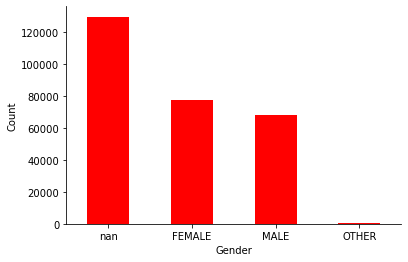

In [16]:
# extra instruction to avoid losing the given plot

## Start code
# use value_count()
users.gender.value_counts(dropna=False).plot(kind='bar',color='red',rot=0)
plt.xlabel("Gender")
plt.ylabel("Count")

# dropna=False is to prevent the nan column from being dropped
# rot=0 means rotation=0 degrees
# try rot=45

## End code
sns.despine() # for aesthetics

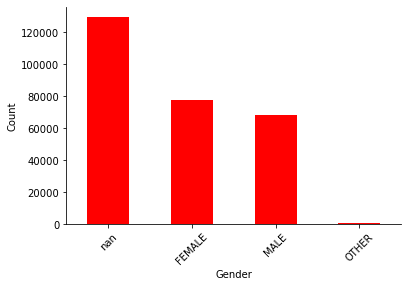

In [17]:
users.gender.value_counts(dropna=False).plot(kind='bar',color='red',rot=45)
plt.xlabel("Gender")
plt.ylabel("Count")

sns.despine()

# inference:

# People don't find it necessary to reveal their gender
# The proportions of male and female users of this travel service are almost equal.

# Now we want to see what where most male and female users travel. How?
# We split the data into gender groups 
# and now we will further split this data (with gender groups) into country 
# or travelling destination groups

In [18]:
## Start code

## End code
sns.despine()

<Figure size 432x288 with 0 Axes>

#### Expected graph:
<img src="./eda_images/gender.png" height="400" width="400"/>

#### Exercise 4:
- Is there any **gender** preferences when travelling to destination country?
- Plot figure as shown below


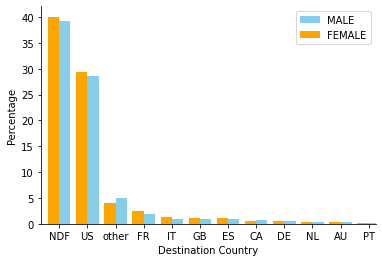

In [19]:
women = sum(users['gender'] == 'FEMALE')
men = sum(users['gender'] == 'MALE')

female_destinations = users.loc[users['gender'] == 'FEMALE', 
                    'country_destination'].value_counts() / women * 100
# taking country_destination values if the gender attribute has value 'FEMALE'. Similarly in the next line for male travellors.

male_destinations = users.loc[users['gender'] == 'MALE', 
                    'country_destination'].value_counts() / men * 100

## Plot bar graph
# Bar width
width = 0.4 # for proper visibility

### Start code

# male_destinations.plot(kind='bar',width=width, color="skyblue", label="MALE", rot=0)
# the variable 'width' has been passed as a value to the width parameter of plot() function
# female_destinations.plot(kind='bar',width=width, color="orange", label="FEMALE", rot=0)
# these plot are overlapped, we need to seperate them...so....

male_destinations.plot(kind='bar',width=width, color="skyblue", label="MALE", rot=0,position=0)
female_destinations.plot(kind='bar',width=width, color="orange", label="FEMALE", rot=0,position=1)

plt.legend()
plt.xlabel("Destination Country")
plt.ylabel("Percentage")

# inferences:

# ndf stands for no destination found
# couples go to holiday destination because the proportions of male and female are almost equal.
# Males and females go to similar destinations
# Many go to US, some go to France, Italy
# Many have not yet booked
# Not much difference between the genders in travelling

### End code
sns.despine()
plt.show()

In [20]:
women = sum(users['gender'] == 'FEMALE')
men = sum(users['gender'] == 'MALE')

female_destinations = users.loc[users['gender'] == 'FEMALE', 
                    'country_destination'].value_counts() / women * 100
male_destinations = users.loc[users['gender'] == 'MALE', 
                    'country_destination'].value_counts() / men * 100

## Plot bar graph
# Bar width
width = 0.4

### Start code










### End code
sns.despine()
plt.show()

<Figure size 432x288 with 0 Axes>

#### Expected graph:

<img src="./eda_images/destination_country.png" height="400" width="400"/>

#### Analysis: 
- Summary: ???

### Missing data - [2] Age
 - **Viewing the data:** age attribute has certain values being **-unknown-**. 
 - Transform these values into **NaN**.
    

In [22]:
## age
users.age.describe()

# describe is for statistical inference 
# that is giving informaion statistically rather than graphically

# min age is 1 so there are infants travelling
# but the age is mentioned for those booking, an infant cannot book a ticket
# there is also a minimum age for booking tickets so that should be the minimum
# the quartile ages are not suspicious
# max is 2014 so someone accidently mentioned the year of travelling in place of age

# maybe this data is changing every year? Or this is random data? 
# this is something to think about
# we are using statistics to understand what is suspicious, like min and max age here.

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

#### Analysis:
 - ???

#### Exercise 5:
   - Display total number of users whose **age** is > 122 and < 18

In [24]:
### Start code

# some methods:
# accessing the age as an array and checking a condition for every value
# using count function

# some optimal methods:
# use sum of ages

### End code

#### Statistical analysis of age attribute with value > 122 and < 18

In [25]:
users[users.age > 122]['age'].describe()

# there are incorrect values in this data:
# see the mean, max, min, the quartiles

# here taking random data is a bad idea
# we can only expect the user to enter the right data

count     830.000000
mean     2002.620482
std        94.201344
min       132.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

In [27]:
users[users.age < 18]['age'].describe()

# there are incorrect values in this data:
# see the mean, max, min, the quartiles

# here taking random data is a bad idea
# we can only expect the user to enter the right data

count    188.000000
mean      12.718085
std        5.764569
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64

#### Analysis: 
Summary: 

The young users seem to be under an acceptable age range.....?

Use index mechanism as it is faster to user (loc, iloc)

#### Exercise 6:
   - Set an acceptable range (95, 16) and put others as NaN in **age**

In [30]:
### Start code


users.loc[users.age==95,'age']=np.nan
users.loc[users.age==16,'age']=np.nan

### End code

#### Age with distribution for better analysis

C:\Users\srish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


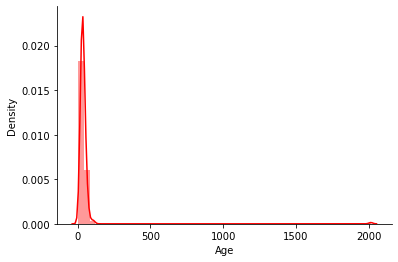

In [32]:
sns.distplot(users.age.dropna(), color='red')
# distplot is an important plot present only in seaborn library
plt.xlabel('Age')
sns.despine()

#### Analysis: The common age of travelers is between 20 and 50.
   - How about older people, do they travel in a different way?    

#### Exercise 7:
   - Lets take arbitrary **age** (eg: 45) and split into two groups, namely, *Young* and *Old* based on **country_destination**.
   - Plot figure as shown below.

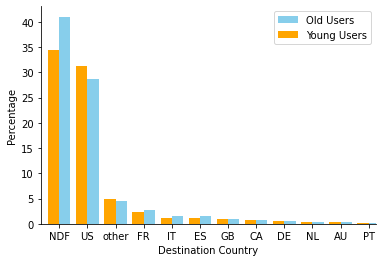

In [36]:
# this value is set as 45 for the given exercise 
# so that we can use the variable 'age' instead of making changes in multiple lines of code
age = 45

# see the code from exercise 4
# we only have to change the attribute being considered and its corresponding conditions
# as well as the variables and labels in the graph

### Start code

young = sum(users['age']<age)
old = sum(users['age']>=age)

young_users = users.loc[users['age']<age, 
                    'country_destination'].value_counts() / young * 100
# taking country_destination values if the gender attribute has value 'FEMALE'. Similarly in the next line for male travellors.

old_users = users.loc[users['age']>=age, 
                    'country_destination'].value_counts() / old * 100


width = 0.4 # for proper visibility

old_users.plot(kind='bar',width=width, color="skyblue", label="Old Users", rot=0,position=0)
young_users.plot(kind='bar',width=width, color="orange", label="Young Users", rot=0,position=1)

### End code

# Plot
plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

# there are some differences in the expected graph and the graph that we got:
# such as the maximum age of 'Old Users'

#### Expected graph:

<img src="./eda_images/young_old.png" height="400" width="400"/>

#### Analysis: 
We can infer that:

1) The young people tend to stay in the US
2) The old people tend tp travel outside thw country
3) Remember that we do not have 45% of the ages

 Are these people engaging in domestic travel or international travel?      

#### Exercise 8:
   - What about native language if 'en', what percentage ? 
   It's mostly Americans as per the given data

In [ ]:
### Start code


print((sum(users.language=='en')/sum(users.language))*100)
# the answer is 90 something percent

### End code

### [3] Dates

In [39]:
users['date_account_created'] = pd.to_datetime(users['date_account_created'])
users['date_first_booking'] = pd.to_datetime(users['date_first_booking'])
users['date_first_active'] = pd.to_datetime((users.timestamp_first_active)// 1000000, format='%Y%m%d')

In [40]:
users.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_first_active
0,2010-06-28,20090319043255,NaT,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2009-03-19
1,2011-05-25,20090523174809,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2009-05-23
2,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2009-06-09
3,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2009-10-31
4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2009-12-08


#### Plot number of user accounts created over time


<AxesSubplot:>

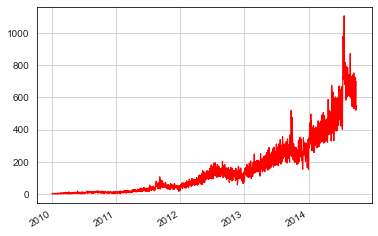

In [42]:

sns.set_style("whitegrid", {'axes.edgecolor': '0'})
#sns.set_context("poster", font_scale=1.1)
users.date_account_created.value_counts().plot(kind='line', linewidth=1.2, color='red')

# the number of people using the site for booking is increasing exponentially
# in inferences we are not concerned by the data itself, 
# as an inference we will say the number of people travelling has been increasing exponentially

# decision makers hate the dashboard (that shows us the data in the form of numbers, and plots)
# because it does not tell the story.
# decision makers need a story to make decisions

# google 'story telling in data'

#### Analysis: 

- We observe how fast the traveler site has grown over the last few years. 
- Does this corelate with the date when the user was active for the first time? 
- **Exercise 9:** It might be similar, how to check the data!


<AxesSubplot:>

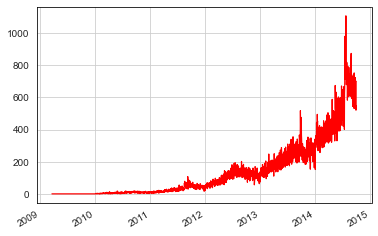

In [45]:
### Start code

users.date_first_active.value_counts().plot(kind="line",linewidth=1.2,color="red")

# this shows us that the booking has almost always happened when the users were active.

### End code

#### Analysis: 
   - ???
    

#### Plot for year 2013 - date_account_created and date_first_active

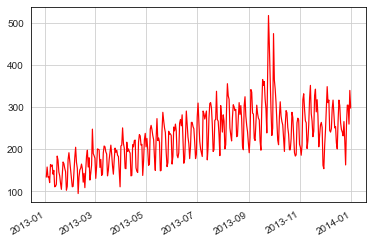

In [46]:
## Select 2013 year for date_account_created

users_2013_a = users[users['date_account_created'] > pd.to_datetime(20130101, format='%Y%m%d')]
users_2013_a = users_2013_a[users_2013_a['date_account_created'] < pd.to_datetime(20140101, format='%Y%m%d')]
users_2013_a.date_account_created.value_counts().plot(kind='line', linewidth=1.2, color='red')
plt.show()


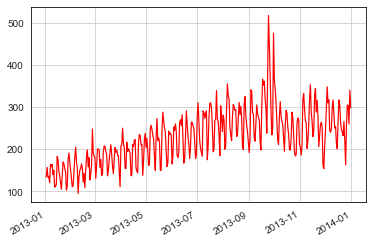

In [47]:
## Select 2013 year for date_first_active

users_2013 = users[users['date_first_active'] > pd.to_datetime(20130101, format='%Y%m%d')]
users_2013 = users_2013[users_2013['date_first_active'] < pd.to_datetime(20140101, format='%Y%m%d')]
users_2013.date_first_active.value_counts().plot(kind='line', linewidth=1.2, color='red')
plt.show()

#### Notice this:

There is very high correlation between the dates when the user account was created and when the user were active

#### Analysis:
  - Small patterns: some peaks at Oct. - Nov.
  - **Exercise 10:** Lets look more closely, in particular days
    

In [49]:
weekdays = []
for date in users.date_account_created:
    weekdays.append(date.weekday())
weekdays = pd.Series(weekdays)

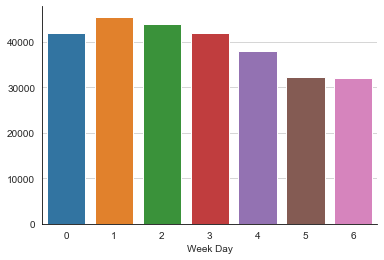

In [51]:
sns.barplot(x = weekdays.value_counts().index, y=weekdays.value_counts().values, order=range(0,7))
plt.xlabel('Week Day')
sns.despine()

# we can explore data yearwise, monthwise, weekwise, so on to get more and more information
# similarly analyze different attributes seperately to see relationships between different attributes 
# and get more information regarding the same

#### Exercise 11: HW 
- Can you find some distinctions between **date_first_active** and **date_account_created** relating to **country_destination**?


#### Exercise 12: HW 
- Are there more registrations but less booking?

#### Exercise 13: HW 
- Does it make sense to find where do users stay when they book 'US'?

#### Exercise 14: HW 
- Try making plots about **devices** and **signups** for analysis

#### Exercise 15: HW 
- Raise many more questions and provide your analysis on rest of the attributes